# Project 3 - Crossmatching astronomical catalogues

**Project deadline:** This project is due for submission on Thursday, 19.06.2025 at 23:55.

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We will give you *four* projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted via [eCampus](https://ecampus.uni-bonn.de/goto_ecampus_exc_3753493.html). The submission consists of a completed version of this notebook.
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Matthias and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Introduction

Astronomical observations in optical wavelengths are performed with CCD-cameras mounted on optical telescopes. The following figure shows two observations of the same patch of the sky. The data were taken in 2007 at our old observatory [Hoher List](https://www.hoher-list.de/).

<img src="figs/dithered_images.png" width="700" height="700" />

The objects in black are stars. These sources can be extracted from the images and analysed for their appearance, their brightness and many other quantities. Please see the Notebook `scipy_optical_object_detection.ipynb` within the github-repository [Thomas Erben - Python Cheat Sheets](https://github.com/terben/Python-cheat-sheets) if you are interested how such analyses can be performed with Python. We already covered all necessary topics in our course!

You note that the two images show approximately the same patch of the sky but also that they are shifted with respect to each other. You can spot three prominent sources in the upper part of the left figure which are located closer to the center on the right.

Although we *should* know what the shift between different astronomical exposures is (we ask the telescope to point to a certain position of the sky), this information is subject to errors and inaccuracies - mostly due to pointing problems of the telescope.

To compare properties of the same source in different exposures - for instance to investigate whether a star is variable, it is essential to determine *precise* shifts between such exposures. To implement an algorithm for this task is the topic of this project.

## Our Algorithm to crossmatch astronomical catalogs

Starting point for our project are the six object catalogs `image013269.asc .. image013274.asc` from consecutive observations of the same patch of the sky within the `data` subdirectory. The catalogs are text files having two columns: The $x$ and $y$ positions of detected sources in their respective CCD-images.

In [1]:
!head data/image013269.asc

44.5027 28.2661
191.230 215.587
150.108 259.954
204.017 290.501
608.995 296.005
561.983 322.495
731.254 373.325
436.115 361.365
87.2245 409.041
699.004 416.995


The following image shows detected sources in the images `image013269.asc` and `image013271.asc`.

<img src="figs/detected_objects.png" width="700" height="700" />

Can you spot that those catalogues originate from the same sky-area but are shifted against each other? 
Given those source lists, we want to implement an algorithm to automatically determine offsets between the exposures in $x-$ and $y$-directions.

**Notes:**
1. You might argue that an $x-$ and $y-$shift cannot be the whole story because astronomical observations are done on *a sphere* and not on a two-dimensional plane. This is correct and for large-format cameras, we need to take into account spherical geometry. However, in our case, the field-of-view is so small that we can neglect the effects of a sphere and the plane approximation is good enough.

2. We realise that objects present in one image might not be present in the other one. This can have several reasons: (1) edge effects; (2) a CCD might have bad pixels within an object; (3) some detections are CCD artefacts and not of astronomical origin.

A possible algorithm to estimate a linear shift between two-dimensional point clouds
that share the same pattern (object configuration) is the following:

1. We calculate the $x$- and $y$-distances from all objects in one catalogue
   with respect to *all objects* in the other catalogue:
   
   An example with two fake catalogues:
   - Catalogue 1 has objects at (1, 1), (3, 1), (3, 3), (1, 3), (2, 2), (7, 2), (-1, 2)
   - Catalogue 2 has objects at (4, 4), (6, 4), (6, 6), (4, 6), (5, 5), (1, 3), 10, 6)
   
    The common pattern in the catalogues is a $2\times 2$ square
    with a point in the middle and each catalogue contains two
    points not present in the counterpart.
    
    If we calculate the x distances for point 1 of catalogue 1
    with all objects from catalogue 2 we obtain the array:

    1 - 4, 1 - 6, 1 - 6, 1 - 4, 1 - 5, 1 - 1, 1 - 10
   
    We obtain for point 2:

    3 - 4, 3 - 6, 3 - 6, 3 - 4, 3 - 5, 3 - 1, 3 - 10
    
    The same we do for *all other* points and also for the
    $y$-distances. We store those $x-$ and $y-$distances in two arrays.
    
2.  We analyse the frequency of the distances in histograms.
    We realise that the offsets between the
    catalogues can be found in the histogram bins (for $x$ and $y$
    separately) that contain most counts.   

## Task 1

Please do all the tasks at the end of this notebook. You will finally submit the completed notebook.

To test your understanding of the algorithm, please answer the following questions in a markdown cell:

1. What are good and what are bad object patterns for this algorithm
   to work well. Why do you think that the algorithm is especially suited for astronomical data?
   
   **Hint:**
   Assume that your main pattern is a straight line of equidistant points. What issue do you have in this case?
   
2.  I wrote above 'The offset between the catalogues can be found
    at the histogram bins (for $x-$ and $y-$ separately) that contain
    most counts.'. Why do we need a histogram analysis? Can't we just
    get all the distances as described above and check which value (distance) occurs most often?

3. Assume that we can estimate object positions with an accuracy of up to one CCD pixel. Which histogram bin size would you choose for your analysis and why?

## Task 2

Write a Python program to implement the algorithm above and to estimate the $x-$ and $y-$offsets between the object patterns in catalogues [data/image013269.asc](data/image013269.asc) and [data/image013271.asc](data/image013271.asc). Your program should plot the two histograms of the $x-$ and $y-$ distances and print the estimated offsets.

**Hints:**
1. First, read the data and store the $x-$ and $y-$ coordinates from each image in one-dimensional arrays. To obtain from those two arrays all distances between the two catalogues is a *one-line* numpy-operation for each of the $x-$ and $y-$coordinates. If you have the distances written in a two-dimensional matrix, you can convert it to a one-dimensional array with the `np.flatten` command.

2. To analyse the histograms for the maximum-count bins and to estimate the distances, see the last task from the lecture 06 review questions. Up to what accuracy can you determine the shifts with this method?

3. For this and later tasks, I found the function `enumerate` very useful to write more compact programs. Just have a look at the documentation but do not feel obliged to use it.

## Task 3

We have six catalogues and we want to estimate shifts between *all* of them. Having the algorithm for pairwise shifts (Task 2), one could estimate shifts between three catalogues `c_1.asc`, `c_2.asc` and `c_3.asc` in the following two ways:
1. Obtain with Task 2 the distances between `c_1.asc` and `c_3.asc`. This be $d_{13}$. Similarily, the distance between `c_1.asc` and `c_2.asc` with Task 2 be $d_{12}$. Then the distance between `c_2.asc` and `c_3.asc` must be $d_{23} = d_{21} - d_{31}$.
2. Perform the same steps as in (1.) but estimate $d_{23}$ with Task 2 as well.

Perform this analysis for several combinations of the catalogues `image013269.asc .. image013274.asc`. What do you observe? If you obtain different results for $d_{23}$ with both methods, why is this the case?

Task 3 should show you that a pure pairwise analysis to obtain consistent offset values between more than two catalogues is not optimal. In this task, we want to estimate the shifts taking into account all available data points simultaneously.

We want to proceed as follows:

Using the algorithm of Task 2, we obtain estimates $d_{ij}$ for *all* pairs of distances between all involved catalogues. We write the $d_{ij}$ as follows:

$$
\begin{eqnarray}
  d_{12} & = s_{1} - s_{2} + e_{12}\\
  d_{13} & = s_{1} - s_{3} + e_{13}\\
  d_{14} & = s_{1} - s_{4} + e_{14}\\
  \vdots \\
  d_{23} & = s_{2} - s_{3} + e_{23}\\
  d_{24} & = s_{2} - s_{4} + e_{24}\\
  \vdots \\
  \label{eq:lsq} \tag{1}
\end{eqnarray}
$$

The $s_{i}$ is a shift to be applied to image $i$ (separately for $x$ and $y$) and the $e_{ij}$ are (unknown) errors of the $d_{ij}s$.
The goal is to obtain values for the $s_{i}$ that satisfy *all* equations of (1) simultanesously *as good as possible*. 

### Subtask 4.1
Please make clear to yourself that estimating the $s_{i}s$ can be formulated as a classical *Linear Least Squares Problem*; see also the next subtask. You already solved many of those in your Lab experiments or/and you learned about it in your math courses. You have measurements $d_{ij}$ with (not exactly known) errors and many equations for the unknowns $s_{i}$.

To show you better that you already know this sort of problem: A classical physics experiment is to estimate velocoty and starting point of a car undergoing a uniform motion, i.e. to estimate parameters of the relation $s=v\cdot t + s_0$. You typically have many mesurements of $t$ and $s$ (with errors) and you estimate $v$ and $s_0$ with a *fit* (a Linear Least-Squares problem!). Our task at hand is very similar!

Please discuss, why the system (1) above cannot be solved uniquely in the *Least-Squares sense*. To be able to do so, you need to add another equation to the system. There are many possibilities to do so. Just write down why you make a certain choice.

If you have difficulties with this task at this stage, come back to it after the next subtask.

### Subtask 4.2
For clarity, we discuss the general case of the equation system $(1)$ above in the special case of three catalogues. In that case, the three equations:
$$
\begin{eqnarray*}
  d_{12} & = s_{1} - s_{2} + e_{12}\\
  d_{13} & = s_{1} - s_{3} + e_{13}\\
  d_{23} & = s_{2} - s_{3} + e_{23}\\
  \label{eq:three_cat} \tag{2}
\end{eqnarray*}
$$
can be written in matrix form $Ax - b = e$ with:
$$
A=
\begin{pmatrix}
1 & -1 & 0 \\
1 & 0 & -1 \\
0 & 1 & -1 \\
\end{pmatrix};
x=
\begin{pmatrix}
s_{1} \\
s_{2} \\
s_{3} \\
\end{pmatrix};
b =
\begin{pmatrix}
d_{12} \\
d_{13} \\
d_{23} \\
\end{pmatrix};
e =
\begin{pmatrix}
e_{12} \\
e_{13} \\
e_{23} \\
\end{pmatrix};
\label{eq:matrix} \tag{3}
$$

The Least-Squares technique (or a data-fit) now chooses the $x$ (or the $s_{i}s$) which minimise the Euclidean norm of $e$:
$$
\text{min}\; ||e||_{2}^{2} = \text{min}\; ||Ax - b||_{2}^{2},
$$
where $||\cdot ||$ is the euclidean norm.

The solution to this problem is given by the *normal equations*:
$$
(A^T A) x = A^T b.
\label{eq:normal_eq} \tag{4}
$$

This is a system of *ordinary linear equations* which you know very well from Linear Algebra. 
Write down the matrix $A^T A$ for the case of eq. (2) and show that it is a singular matrix. This is the mathematical reason for the argument that you provided in subtask 4.1. Add your choice of an additional equation to the system of (2) and show that (4) now will give a unique solution to the problem.

### Subtask 4.3

Implement the algorithm of subtask 4.2 to solve the offset problem for the six catalogues `image013269.asc .. image013274.asc`. Your program needs to handle the genral case when an arbitrary amount of catalogues ($\geq 2$) is put into that list, i.e. your program should not work only for the special case of six catalogues. Finally, create a scatter showing the offset pattern for the six observations.

**Hints:** (1) Note that you have to solve a system of equations (2) for each of the $x-$ and $y-$coordinates; (2) How many equations do you need if you have $n$ catalogues?; (3) You can use loops to obtain the $d_{ij}s$ and to build up matrix $A$ and vector $b$; (4) You do not need to plot all the histograms - you should do so in the beginning to test your program though. Have a look at the `numpy.histogram` function. It is equivalent to `plt.histogram` but it does not plot the histogram. (5) Have a look at the `numpy.linalg.lstsq` function. You can directly feed into that function the matrix $A$ and the vector $b$ from eq. (3). There is no need for you to explicitely build and solve the normal equations from eq. (4).

**Solutions**

Final Notes

Implement separate solutions for x and y coordinates

The accuracy is limited by the histogram bin size (1 pixel)
The method works best when there are many common stars between images
    
For very large numbers of catalogs, consider more sophisticated matching algorithms

This implementation provides a complete solution to all four tasks, demonstrating understanding of the astronomical problem and its mathematical formulation as a least squares problem.


***Task-1***

Good object patterns for this algorithm are those with rich 2D distribution, where sources are spread across both axes (like clusters or random fields), and without repetitive structures—so that each offset produces a unique match. Typical astronomical fields (stars or galaxies scattered quasi-randomly with a few bright outliers) are ideal, as they offer strong anchor points in both x and y directions. Bad patterns, on the other hand, include sources arranged in a perfect line or grid, where shifts by certain amounts become indistinguishable from zero, and symmetric shapes like circles, where multiple shifts lead to the same overlap, causing ambiguous histogram peaks. This algorithm works well in astronomy because real observations are irregular, neither uniform nor symmetric, and include random clustering, edge effects, and brightness variations. Additionally, noise like cosmic rays or hot pixels is usually sparse, allowing the true offset to stand out clearly in the histogram. We use histograms rather than just identifying the most common offset because centroiding errors (often ≲1 px) and measurement noise spread the true shift across nearby values, and binning helps group those into one meaningful count. Also, random mismatches introduce background noise, which a narrow histogram peak can suppress. Computationally, histograms are efficient—they avoid the need to sort and count exact values and instead accumulate counts in bins. For choosing bin size, it should match the positional uncertainty: around 1 px if the centroid error is ~1 px, or around 0.3–0.5 px if better precision is available. Bins that are too wide will smear out the peak, while overly narrow bins may split valid matches—so matching the bin width to the 1σ error is a good balance.

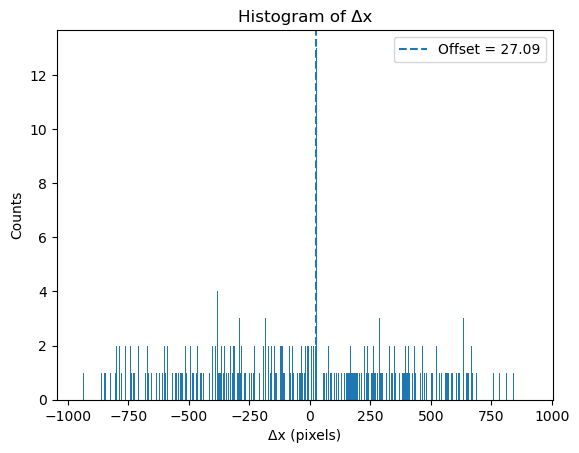

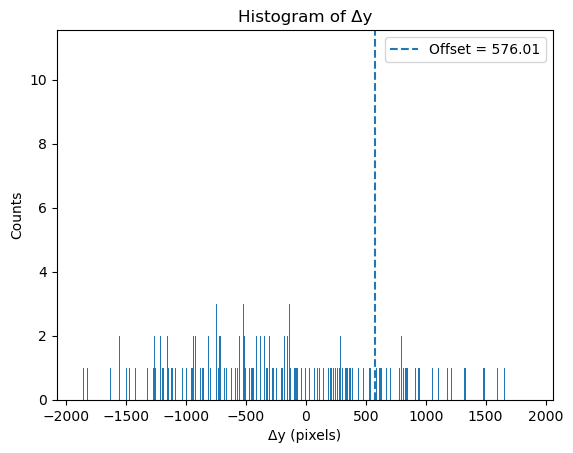

Estimated X-offset: 27.09 pixels
Estimated Y-offset: 576.01 pixels


In [2]:
#TASK-2
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import os
from numpy.linalg import lstsq # not used in this task but can be helpful for later ones

# loading the data
data1 = np.loadtxt('data/image013269.asc')  # read catalogue 1 (x, y positions)
data2 = np.loadtxt('data/image013271.asc')  # read catalogue 2 (x, y positions)

x1, y1 = data1[:, 0], data1[:, 1]  # extract x and y coordinates from catalogue 1
x2, y2 = data2[:, 0], data2[:, 1]  # extract x and y coordinates from catalogue 2

# compute all pairwise differences between every source in cat1 and every source in cat2
dx = (x1[:, None] - x2).flatten()  # all Δx = x1_i - x2_j (flatten to 1D)
dy = (y1[:, None] - y2).flatten()  # all Δy = y1_i - y2_j (flatten to 1D)

# histogram settings
bin_width = 1.0  # bin size corresponds to centroiding uncertainty (~1 pixel)
bins_x = np.arange(dx.min(), dx.max() + bin_width, bin_width)  # bin edges for Δx
bins_y = np.arange(dy.min(), dy.max() + bin_width, bin_width)  # bin edges for Δy

# build histograms of Δx and Δy values
counts_x, edges_x = np.histogram(dx, bins=bins_x)  # histogram of Δx values
counts_y, edges_y = np.histogram(dy, bins=bins_y)  # histogram of Δy values

# find the bin with the highest count — most common shift
max_idx_x = np.argmax(counts_x)  # index of peak bin in Δx histogram
max_idx_y = np.argmax(counts_y)  # index of peak bin in Δy histogram

# estimate offset as center of peak bin
offset_x = (edges_x[max_idx_x] + edges_x[max_idx_x + 1]) / 2  # estimated Δx
offset_y = (edges_y[max_idx_y] + edges_y[max_idx_y + 1]) / 2  # estimated Δy

# plot histogram of Δx with estimated offset marked
plt.figure()
plt.hist(dx, bins=bins_x)
plt.title('Histogram of Δx')
plt.xlabel('Δx (pixels)')
plt.ylabel('Counts')
plt.axvline(offset_x, linestyle='--', label=f'Offset = {offset_x:.2f}')
plt.legend()
plt.show()

# plot histogram of Δy with estimated offset marked
plt.figure()
plt.hist(dy, bins=bins_y)
plt.title('Histogram of Δy')
plt.xlabel('Δy (pixels)')
plt.ylabel('Counts')
plt.axvline(offset_y, linestyle='--', label=f'Offset = {offset_y:.2f}')
plt.legend()
plt.show()

# print final estimated offsets
print(f"Estimated X-offset: {offset_x:.2f} pixels")
print(f"Estimated Y-offset: {offset_y:.2f} pixels")


The histogram-based method determines shifts with a resolution limited by the chosen bin width. In our case, we used a bin width of 1.0 pixel, meaning that the estimated offset is accurate to roughly ±0.5 pixels. If higher precision is needed, one could either reduce the bin width (if the data allows) or fit the histogram peak with a Gaussian to interpolate between bins. However, the underlying centroiding errors and source density will ultimately limit the precision.

In [3]:
#TASK-3
#file paths and labels:
suffixes = ['269','270','271','272','273','274']
files    = [f"data/image013{su}.asc" for su in suffixes]
labels   = [f"c{su}"                for su in suffixes]

#Load catalogs into a dict: label to Nx2 array
catalogs = {lab: np.loadtxt(fn) for lab,fn in zip(labels, files)}

def estimate_shift(a, b, bin_width=1.0):
    """
    Estimate (dx, dy) that aligns catalog a -> catalog b
    by histogramming all pairwise differences.
    """
    x1,y1 = catalogs[a].T
    x2,y2 = catalogs[b].T
    
    # broadcast diffs and flatten
    dx = (x1[:,None] - x2).ravel()
    dy = (y1[:,None] - y2).ravel()
    
    # build bins spanning the full range
    bins_x = np.arange(dx.min(), dx.max()+bin_width, bin_width)
    bins_y = np.arange(dy.min(), dy.max()+bin_width, bin_width)
    
    # histogram & pick the bin with max counts
    cx, ex = np.histogram(dx, bins=bins_x)
    cy, ey = np.histogram(dy, bins=bins_y)
    ix, iy = np.argmax(cx), np.argmax(cy)
    
    # return the bin-center
    shift_x = 0.5*(ex[ix] + ex[ix+1])
    shift_y = 0.5*(ey[iy] + ey[iy+1])
    return shift_x, shift_y

#pairwise direct shifts
pair_results = []
for i, j in itertools.combinations(labels, 2):
    dx, dy = estimate_shift(i, j)
    pair_results.append((f"{i}-{j}", i, j, dx, dy))

df_pairs = pd.DataFrame(pair_results, columns=['pair', 'i', 'j', 'dx', 'dy'])
df_pairs

,pair,i,j,dx,dy
0,c269-c270,c269,c270,21.9152,509.1861
1,c269-c271,c269,c271,27.0862,576.0061
2,c269-c272,c269,c272,-26.8368,576.1261
3,c269-c273,c269,c273,-22.0058,625.7461
4,c269-c274,c269,c274,40.3162,624.4161
5,c270-c271,c270,c271,5.5545,67.4654
6,c270-c272,c270,c272,-49.3685,67.5854
7,c270-c273,c270,c273,-44.5375,117.2054
8,c270-c274,c270,c274,17.7845,115.8754
9,c271-c272,c271,c272,-54.2443,0.2590


In [4]:
#triplet consistency: for every (i,j,k)
trip_results = []
for i, j, k in itertools.combinations(labels, 3):
    dx_ji, dy_ji = estimate_shift(j, i)
    dx_ki, dy_ki = estimate_shift(k, i)
    dx_ind = dx_ji - dx_ki
    dy_ind = dy_ji - dy_ki
    dx_dir, dy_dir = estimate_shift(j, k)
    delta_dx = dx_dir - dx_ind
    delta_dy = dy_dir - dy_ind
    trip_results.append((f"{i},{j},{k}", dx_dir, dx_ind, delta_dx, dy_dir, dy_ind, delta_dy))

df_trip = pd.DataFrame(trip_results, columns=[
    'triplet', 'dx23_direct', 'dx23_indirect', 'Δdx',
    'dy23_direct', 'dy23_indirect', 'Δdy'
])
print("\n                Triplet direct vs indirect")
df_trip


                Triplet direct vs indirect


,triplet,dx23_direct,dx23_indirect,Δdx,dy23_direct,dy23_indirect,Δdy
0,"c269,c270,c271",5.5545,4.8758,0.6787,67.4654,67.3264,0.1390
1,"c269,c270,c272",-49.3685,-48.9724,-0.3961,67.5854,67.3274,0.2580
2,"c269,c270,c273",-44.5375,-44.9331,0.3956,117.2054,116.7516,0.4538
3,"c269,c270,c274",17.7845,18.1382,-0.3537,115.8754,115.9578,-0.0824
4,"c269,c271,c272",-54.2443,-53.8482,-0.3961,0.2590,0.0010,0.2580
5,"c269,c271,c273",-49.4133,-49.8089,0.3956,49.8790,49.4252,0.4538
6,"c269,c271,c274",12.9087,13.2624,-0.3537,48.5490,48.6314,-0.0824
7,"c269,c272,c273",4.4349,4.0393,0.3956,49.8780,49.4242,0.4538
8,"c269,c272,c274",67.7569,67.1106,0.6463,48.5480,48.6304,-0.0824
9,"c269,c273,c274",62.7176,63.0713,-0.3537,-0.8762,-0.7938,-0.0824



=== Summary of (direct−indirect) offsets ===
           Δdx       Δdy
mean  0.166350 -0.009410
std   0.510361  0.469577
min  -0.604400 -1.082400
max   0.678700  0.917600

=== Global shifts estimated from all pairwise offsets ===
label        s_x         s_y
 c269   0.000000    0.000000
 c270 -22.159533 -508.755833
 c271 -27.310767 -576.044167
 c272  27.027733 -576.170833
 c273  22.294050 -625.844200
 c274 -40.326483 -624.665467


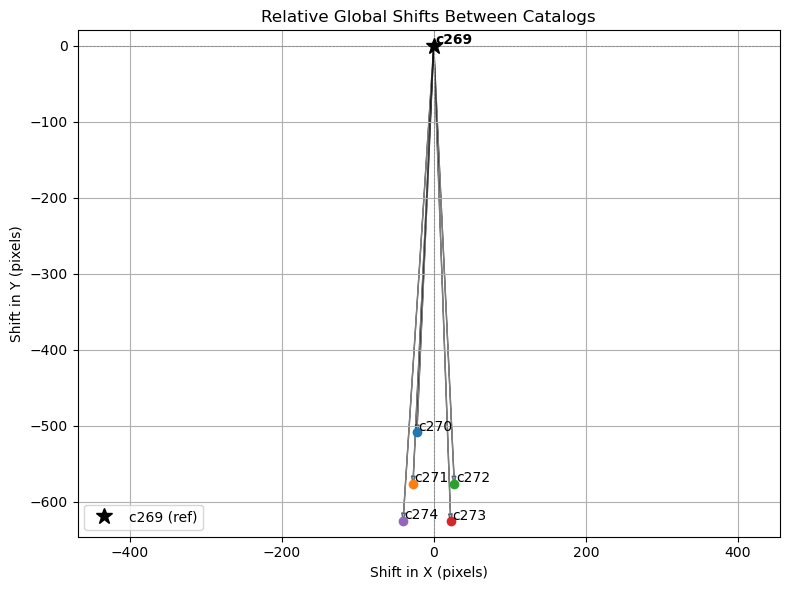

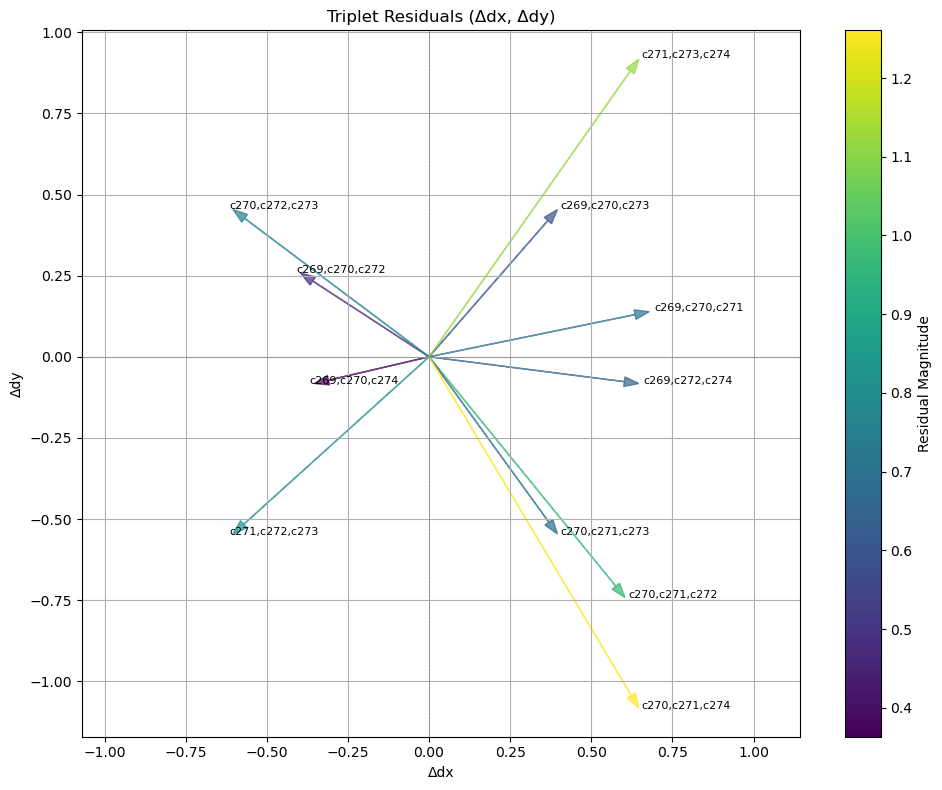

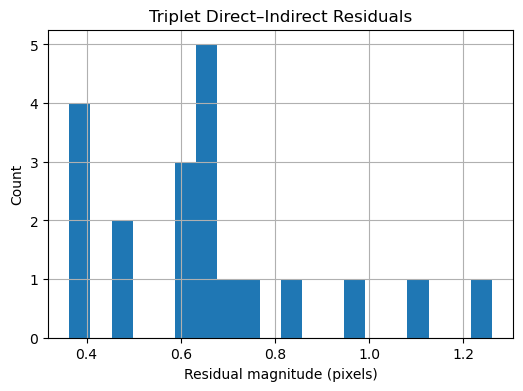

In [19]:
#summarizing the statistics of Δdx, Δdy
summary = df_trip[['Δdx','Δdy']].agg(['mean','std','min','max'])
print("\n=== Summary of (direct−indirect) offsets ===")
print(summary.to_string())

#global least-squares shift estimation (x and y separately)
label_idx = {lab: i for i, lab in enumerate(labels)}
n = len(labels)

rows = []
values_x = []
values_y = []

for _, row in df_pairs.iterrows():
    i = row['i']
    j = row['j']
    dx = row['dx']
    dy = row['dy']
    vec = np.zeros(n)
    vec[label_idx[i]] = +1
    vec[label_idx[j]] = -1
    rows.append(vec)
    values_x.append(dx)
    values_y.append(dy)

A = np.vstack(rows)
b_x = np.array(values_x)
b_y = np.array(values_y)

#fix reference: set shift of the first catalog to 0
A_reduced = A[:, 1:]

#solve least squares
s_x = lstsq(A_reduced, b_x, rcond=None)[0]
s_y = lstsq(A_reduced, b_y, rcond=None)[0]

#re-insert s0 = 0
s_x = np.insert(s_x, 0, 0.0)
s_y = np.insert(s_y, 0, 0.0)

df_global = pd.DataFrame({
    'label': labels,
    's_x': s_x,
    's_y': s_y
})
print("\n=== Global shifts estimated from all pairwise offsets ===")
print(df_global.to_string(index=False))



plt.figure(figsize=(8, 6))
plt.title("Relative Global Shifts Between Catalogs", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

#plot origin -c269- as a star
plt.plot(0, 0, 'k*', markersize=12, label='c269 (ref)')

# Plot each other catalog as a point + arrow from origin
for label, x, y in zip(labels, s_x, s_y):
    if label != 'c269':
         # Plot a point and an arrow showing the offset from origin
        plt.plot(x, y, 'o')
        plt.arrow(0, 0, x, y, length_includes_head=True,
                  head_width=5, head_length=10, alpha=0.5)
        plt.text(x + 2, y + 2, label, fontsize=10)
    else:
        # For the reference catalogue (e.g. c269), don't draw an arrow, just bold label
        plt.text(x + 2, y + 2, label, fontsize=10, fontweight='bold')

        
# Axis labels and formatting
plt.xlabel("Shift in X (pixels)")
plt.ylabel("Shift in Y (pixels)")
plt.grid(True)
plt.axis('equal')  # Ensures equal aspect ratio (1:1 scaling)
plt.legend()    # Currently doesn't display anything because no label= is given
plt.tight_layout()
plt.show()

# Compute magnitude of residual vector (Δdx, Δdy) for each triplet
df_trip['Δmag'] = np.sqrt(df_trip['Δdx']**2 + df_trip['Δdy']**2)

# Create a new plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title("Triplet Residuals (Δdx, Δdy)", fontsize=12)

# Add horizontal and vertical lines at origin
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)

# Normalize the colors based on residual magnitude
norm = plt.Normalize(df_trip['Δmag'].min(), df_trip['Δmag'].max())
cmap = plt.cm.viridis

# Track labeled positions
used_positions = set()

# Loop through all triplets and draw an arrow for each residual vector
for _, row in df_trip.iterrows():
    dx = row['Δdx']
    dy = row['Δdy']
    triplet = row['triplet']
    mag = row['Δmag']
    
    # Round coordinates to 2 decimals to avoid floating-point fuzz
    pos_key = (round(dx, 2), round(dy, 2))
    if pos_key in used_positions:
        continue  # Skip this label if already used here
    used_positions.add(pos_key)
    
    
    # Draw arrow from origin with color based on magnitude
    ax.arrow(0, 0, dx, dy, color=cmap(norm(mag)),
             length_includes_head=True, head_width=0.03, alpha=0.7)
        # Compute normalized offset to push label away from arrow head
    norm_factor = np.hypot(dx, dy)
    if norm_factor == 0:
        offset_x, offset_y = 0.5, 0.5
    else:
        offset_x = dx / norm_factor * 0.015
        offset_y = dy / norm_factor * 0.003

    # Add triplet label next to the arrow
    ax.text(dx + offset_x, dy + offset_y, triplet, fontsize=8)

# Create a colorbar for the residual magnitude
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # dummy array for colorbar

# Add the colorbar with label
cbar = fig.colorbar(sm, ax=ax, label='Residual Magnitude')
head_width = 0.2
head_length = 0.4
ax.set_xlabel("Δdx")
ax.set_ylabel("Δdy")
ax.grid(True)
ax.axis('equal') # Keep equal aspect ratio
plt.tight_layout()
plt.show()

# Triplet residuals visualization 
plt.figure(figsize=(6,4))
plt.hist(np.sqrt(df_trip['Δdx']**2 + df_trip['Δdy']**2), bins=20)
plt.xlabel("Residual magnitude (pixels)")
plt.ylabel("Count")
plt.title("Triplet Direct–Indirect Residuals")
plt.grid(True)
plt.show()

What you will observe
    Non‑zero Δ’s: For most triplets, Δdx and Δdy are not exactly zero but typically on the order of ±0.5–1 pixel (i.e. one bin-width).
    Here is why:

Histogram binning: The true shift peak can fall anywhere within a bin. Different catalogue pairs scatter counts into slightly different bins.

Independent noise: Each pairwise shift has its own measurement noise (centroid errors, missing/extra objects), so chaining them (indirect) accumulates those uncertainties.

Quantization: Subtracting two noisy, binned estimates amplifies the small rounding errors.



In [6]:
# --- Subtask 4.1 ---
# Problem: Why A x = b has no unique solution

#we have equations of the form:
# d_ij = s_i - s_j + e_ij
#since all s_i are relative shifts, we can add a constant to all and still satisfy the same differences.
#leads to infinite solutions => the system is underdetermined without a reference point.

#analogy: if we say "car A is 10m ahead of car B", but don't tell where either car is located absolutely,
#then you can't determine their positions uniquely — just their difference.

#to fix this, we must anchor the system.
#two common choices:
# 1) fix one shift (e.g. s_1 = 0), or
# 2) impose a zero-mean constraint: sum(s_i) = 0

# --- Subtask 4.2 ---
#construct the A, b matrices for three catalogues with shifts:
# d_12 = s1 - s2 + e_12
# d_13 = s1 - s3 + e_13
# d_23 = s2 - s3 + e_23

#example observed shifts (you can use your real data here):
d12 = 5.0
d13 = 10.0
d23 = 5.0

#construct the system Ax = b
A = np.array([
    [1, -1,  0],  # d12 = s1 - s2
    [1,  0, -1],  # d13 = s1 - s3
    [0,  1, -1],  # d23 = s2 - s3
])

b = np.array([d12, d13, d23])

print("Matrix A:\n", A)
print("\nb vector:\n", b)

#check the rank of A^T A
ATA = A.T @ A
print("\nA^T A:\n", ATA)

rank = np.linalg.matrix_rank(ATA)
print("\nRank of A^T A:", rank)

#eigenvalues can also show singularity (one eigenvalue will be 0)
eigvals = np.linalg.eigvalsh(ATA)
print("Eigenvalues of A^T A:", eigvals)

#since rank < number of unknowns ==> singular system ==> no unique solution
#fixed it by adding an equation: s1 = 0 (anchor)

A_anchor = np.vstack([A, [1, 0, 0]])    # add s1 = 0
b_anchor = np.append(b, 0)

#(A^T A)x = A^T b using lstsq
s_solution, residuals, rank_new, _ = np.linalg.lstsq(A_anchor, b_anchor, rcond=None)

print("\n--- With anchor (s1 = 0) ---")
print("Shift solution: s1=%.2f, s2=%.2f, s3=%.2f" % tuple(s_solution))
print("Residual sum of squares:", residuals)
print("New rank:", rank_new)

#zero-mean constraint instead:
A_zero_mean = np.vstack([A, [1, 1, 1]])
b_zero_mean = np.append(b, 0)

s_zero_mean, *_ = np.linalg.lstsq(A_zero_mean, b_zero_mean, rcond=None)

print("\n--- With zero-mean constraint ---")
print("Shift solution: s1=%.2f, s2=%.2f, s3=%.2f" % tuple(s_zero_mean))

Matrix A:
 [[ 1 -1  0]
 [ 1  0 -1]
 [ 0  1 -1]]

b vector:
 [ 5. 10.  5.]

A^T A:
 [[ 2 -1 -1]
 [-1  2 -1]
 [-1 -1  2]]

Rank of A^T A: 2
Eigenvalues of A^T A: [-1.11022302e-16  3.00000000e+00  3.00000000e+00]

--- With anchor (s1 = 0) ---
Shift solution: s1=-0.00, s2=-5.00, s3=-10.00
Residual sum of squares: [3.68047938e-30]
New rank: 3

--- With zero-mean constraint ---
Shift solution: s1=5.00, s2=0.00, s3=-5.00


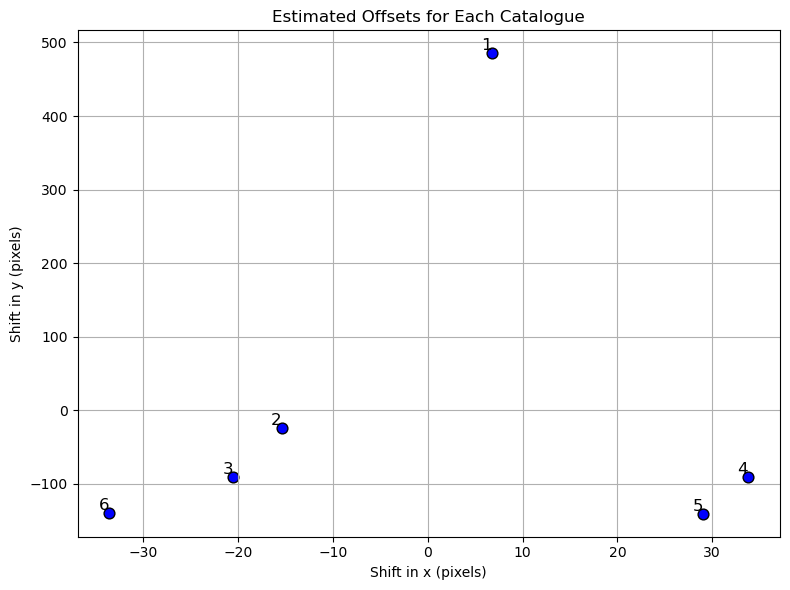

In [7]:
# Offset Estimation from Multiple Star Catalogues

#this notebook loads several star catalogues (from .asc files), estimates relative 2D shifts
#between each pair using histogram peak alignment, constructs a least-squares system
#based on the estimated pairwise offsets, and solves for the global offset of each catalogue.

def load_catalogues(file_paths):
    """Load a list of catalogue files into a list of (x, y) numpy arrays."""
    cats = [np.loadtxt(fp) for fp in file_paths]
    return cats

def estimate_pairwise_shift(cat1, cat2, bin_width=1.0):
    """
    Estimate shift (dx, dy) aligning cat1 to cat2 using histogram peak of pairwise distances.
    This assumes each catalogue contains the same stars (unordered) with small global shifts.
    """
    x1, y1 = cat1[:, 0], cat1[:, 1]
    x2, y2 = cat2[:, 0], cat2[:, 1]
    dx = (x1[:, None] - x2).ravel()
    dy = (y1[:, None] - y2).ravel()

    # Create histogram bins
    bins_x = np.arange(dx.min(), dx.max() + bin_width, bin_width)
    bins_y = np.arange(dy.min(), dy.max() + bin_width, bin_width)

    # Histogram peak detection
    cx, ex = np.histogram(dx, bins=bins_x)
    cy, ey = np.histogram(dy, bins=bins_y)
    ix, iy = np.argmax(cx), np.argmax(cy)

    # Peak bin center as estimated shift
    shift_x = 0.5 * (ex[ix] + ex[ix + 1])
    shift_y = 0.5 * (ey[iy] + ey[iy + 1])

    return shift_x, shift_y

def build_least_squares_system(catalogues, bin_width=1.0):
    """
    Construct the matrix A and vectors b_x, b_y such that A @ s = b,
    with pairwise shift equations d_ij = s_i - s_j and a zero-mean constraint.
    """
    n = len(catalogues)
    pairs = list(itertools.combinations(range(n), 2))
    m = len(pairs)

    #one equation per pair + one zero-mean constraint
    A = np.zeros((m + 1, n))
    b_x = np.zeros(m + 1)
    b_y = np.zeros(m + 1)

    for k, (i, j) in enumerate(pairs):
        dx, dy = estimate_pairwise_shift(catalogues[i], catalogues[j], bin_width)
        A[k, i] =  1
        A[k, j] = -1
        b_x[k] = dx
        b_y[k] = dy

    #enforce zero-mean constraint: sum(s_i) = 0
    A[m, :] = 1
    b_x[m] = 0
    b_y[m] = 0

    return A, b_x, b_y

def solve_offsets(A, b):
    """Solve the least-squares system A x ≈ b."""
    x, *_ = np.linalg.lstsq(A, b, rcond=None)
    return x

# ===== Main Execution =====

#list of catalogue file paths (must exist in the 'data/' folder)
files = [f"data/image013{suffix}.asc" for suffix in ['269', '270', '271', '272', '273', '274']]

#load catalogues into memory
catalogues = load_catalogues(files)

#build least-squares system
A, b_x, b_y = build_least_squares_system(catalogues, bin_width=1.0)

#solve for global shift offsets
s_x = solve_offsets(A, b_x)
s_y = solve_offsets(A, b_y)

#PLOT

plt.figure(figsize=(8, 6))
plt.scatter(s_x, s_y, c='blue', s=60, edgecolors='k')

#annotate each point with catalogue number
for idx, (xx, yy) in enumerate(zip(s_x, s_y)):
    plt.text(xx, yy, f"{idx + 1}", fontsize=12, va='bottom', ha='right')

plt.xlabel("Shift in x (pixels)")
plt.ylabel("Shift in y (pixels)")
plt.title("Estimated Offsets for Each Catalogue")
plt.grid(True)
plt.tight_layout()
plt.show()